In [2]:
# Is this readable? Yes!  I think so!

We will import our usual things:

In [6]:
%matplotlib inline 
# makes sure I've got inline plots, gotta not be next to % magic function
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "sans-serif"

import numpy as np

# to deal with images
import PIL.Image as Image

In [7]:
im = Image.open("/Users/jillnaiman/Downloads/stitch_reworked.png")

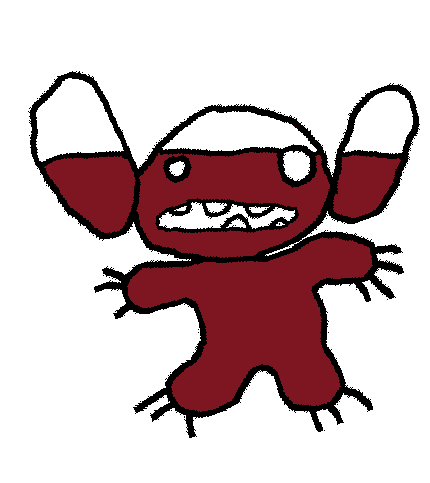

In [8]:
im

In [9]:
im_data = np.array(im)
im_data

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [10]:
im_data.shape

(483, 430, 4)

Let's use a cool NumPy function to see how many RGBA combinations (i.e. how many colors are in our image):

In [18]:
np.unique(im_data.reshape(-1, im_data.shape[2]), axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [13]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

In [14]:
im.show()

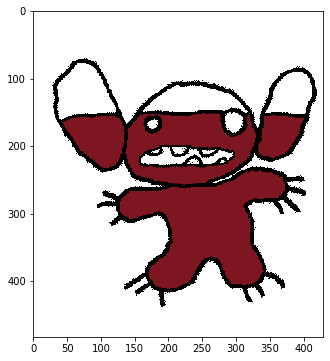

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(im_data)
plt.show()

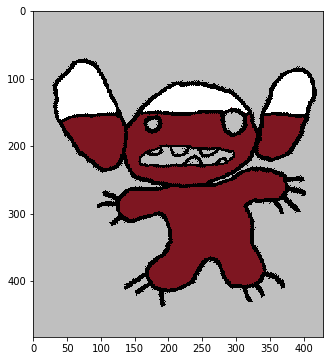

In [25]:
fig, ax = plt.subplots(figsize=(6,6))
# I'm going to do a little trick and plot gray underneath
ax.imshow(im_data*0.0+0.5) # a bunch of RGBA = (0.5, 0.5, 0.5, 0.5)
ax.imshow(im_data)
plt.show()

In [26]:
#im_data*0.0+0.5

Let's think about how we can filter our data.

Let's first pick out all the "good" pixels.

In [31]:
# for white: RGBA = 255, 255, 255, 255
# "mask" out just the good pixels
reds_good_mask = im_data[:,:,0] == 255
greens_good_mask = im_data[:,:,1] == 255
blues_good_mask = im_data[:,:,2] == 255
alpha_good_mask = im_data[:,:,3] == 255
#im_data[reds_good_mask]
pixel_mask_good = reds_good_mask & greens_good_mask & blues_good_mask \
  & alpha_good_mask

In [32]:
good_pixels = im_data[pixel_mask_good]

In [33]:
ngood = len(good_pixels)
ngood

11929

I'm going to replot our image with just these pixels showing:

In [34]:
im_data_masked_good = im_data.copy() # numpy way of copying data
im_data_masked_good[~pixel_mask_good] = 0 
# this will make all of the the "not good" pixels transparent (and black)

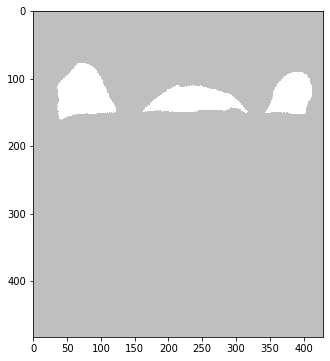

In [63]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(im_data*0.0+0.5) # our trick to make gray background
ax.imshow(im_data_masked_good)
plt.show()

In [36]:
reds_bad_mask = im_data[:,:,0] == 126 # RED!!!
greens_bad_mask = im_data[:,:,1] == 22
blues_bad_mask = im_data[:,:,2] == 33
alpha_bad_mask = im_data[:,:,3] == 255 # 255 = fully opaque (not transparent)

pixel_mask_bad = reds_bad_mask & greens_bad_mask & blues_bad_mask \
  & alpha_bad_mask

In [38]:
nbad = len(im_data[pixel_mask_bad])
nbad

40949

In [39]:
total_pixels = ngood + nbad # total number of good or bad pixels
badness = nbad/total_pixels
goodness = ngood/total_pixels
print("badness =", badness, "goodness=", goodness)

badness = 0.774405234691176 goodness= 0.22559476530882408


One way of plotting our new, filtered and mutated data is as a histogram.

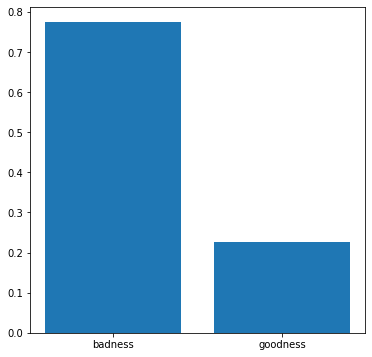

In [40]:
fig, ax = plt.subplots(figsize=(6,6))
labels = np.array(["badness", "goodness"])
values = np.array([badness, goodness])

ax.bar(labels, values)

plt.show()

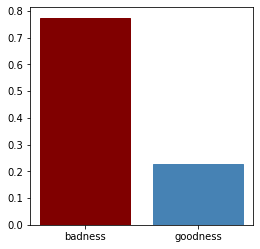

In [42]:
fig, ax = plt.subplots(figsize=(4,4))
labels = np.array(["badness", "goodness"])
values = np.array([badness, goodness])
colors = np.array(['maroon', 'steelblue'])

myBarChart = ax.bar(labels, values)

# set colors of each bar individually
for i in range(len(myBarChart)): # for all bars in my barchart
    myBarChart[i].set_color(colors[i])
    
plt.show()

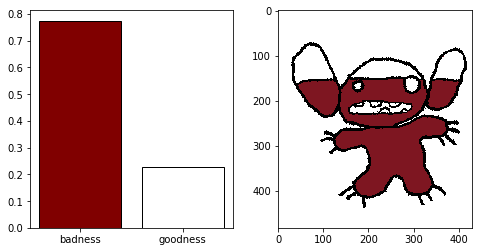

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
labels = np.array(["badness", "goodness"])
values = np.array([badness, goodness])
colors = np.array(['maroon', 'white'])

myBarChart = ax[0].bar(labels, values) # now I have a *vector* of axes
ax[1].imshow(im_data)

# set colors of each bar individually
for i in range(len(myBarChart)): # for all bars in my barchart
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black')
    
plt.show()

Let's make a histogram of all of the colors.  We have to do a bit more preprocessing, BUT its all stuff we've kind of already done.

In [59]:
myList = [] # start with an empty list
for i in range(3):
    myList.append(i)
myList

[0, 1, 2]

In [51]:
number_of_pixels_of_a_color = [] # num of pixels at a particular color
color_labels = [] # how we label those colors on our histogram
color_values = [] # RGBA sequences

In [52]:
unique_colors = np.unique(im_data.reshape(-1, im_data.shape[2]), axis=0)
unique_colors

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [54]:
for icolor,rgba in enumerate(unique_colors):
    #print(icolor, rgba)
    # we want to count pixels with whatever rgba combination
    # step 1: mask out pixels at a particular color
    reds_mask = im_data[:,:,0] == rgba[0] 
    greens_mask = im_data[:,:,1] == rgba[1]
    blues_mask = im_data[:,:,2] == rgba[2]
    alpha_mask = im_data[:,:,3] == rgba[3]

    pixel_mask = reds_mask & greens_mask & blues_mask \
      & alpha_mask
    
    # step 2: count up all pixels
    npixels = len(im_data[pixel_mask])
    
    # store the number of pixels for this rgba combo
    number_of_pixels_of_a_color.append(npixels) # appending to a list obj.
    # also want to name these colors
    color_labels.append("Color #" + str(icolor))
    # last thing: color values
    color_values.append(rgba/255) # this is converting to matplotlib bar

In [55]:
color_labels

['Color #0', 'Color #1', 'Color #2', 'Color #3']

In [56]:
color_values

[array([0., 0., 0., 0.]),
 array([0., 0., 0., 1.]),
 array([0.49411765, 0.08627451, 0.12941176, 1.        ]),
 array([1., 1., 1., 1.])]

In [57]:
number_of_pixels_of_a_color

[135103, 19709, 40949, 11929]

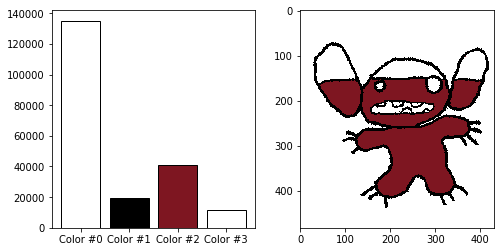

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

myBarChart = ax[0].bar(color_labels, number_of_pixels_of_a_color) # now I have a *vector* of axes
ax[1].imshow(im_data)

# set colors of each bar individually
for i in range(len(myBarChart)): # for all bars in my barchart
    myBarChart[i].set_color(color_values[i])
    myBarChart[i].set_edgecolor('black')
    
plt.show()

# Stuff with CSV files (tabular data)
(We just did "spatial" data).

In [64]:
import csv

Open up a file, in the usual way:

In [65]:
f = open("/Users/jillnaiman/Downloads/building_inventory.csv")

In [66]:
f.seek(0) # start at top of file
for record in csv.reader(f):
    print(record)

['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County', 'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name', 'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade', 'Usage Description', 'Usage Description 2', 'Usage Description 3']
['Department of Natural Resources', 'Anderson Lake Conservation Area - Fulton County', 'Anderson Lake C.a.', 'Astoria', '61501', 'Fulton', '17', 'Cheri Bustos', '93', 'Hammond Norine K.', '47', 'Jil Tracy', 'In Use', '1975', '1975', '144', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources', 'Anderson Lake Conservation Area - Fulton County', 'Anderson Lake C.a.', 'Astoria', '61501', 'Fulton', '17', 'Cheri Bustos', '93', 'Hammond Norine K.', '47', 'Jil Tracy', 'In Use', '2004', '2004', '144', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources'

['Department of Natural Resources', 'Moraine View State Park - McLean County', 'R.r. #2, Box 110', 'Leroy', '61752', 'McLean', '18', 'Darin M. LaHood', '101', 'Mitchell Bill', '51', 'Chapin Rose', 'In Use', '1996', '1996', '140', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources', 'Moraine View State Park - McLean County', 'R.r. #2, Box 110', 'Leroy', '61752', 'McLean', '18', 'Darin M. LaHood', '101', 'Mitchell Bill', '51', 'Chapin Rose', 'In Use', '1963', '1963', '805', '1', '1', '0', 'Storage', 'Storage', 'Not provided']
['Department of Natural Resources', 'Moraine View State Park - McLean County', 'R.r. #2, Box 110', 'Leroy', '61752', 'McLean', '18', 'Darin M. LaHood', '101', 'Mitchell Bill', '51', 'Chapin Rose', 'In Use', '1985', '1985', '1115', '1', '1', '0', 'Storage', 'Storage', 'Not provided']
['Department of Natural Resources', 'Moraine View State Park - McLean County', 'R.r. #2, Box 110', 'Leroy', '61752', 'McLean', '18', 'Darin M. LaHood'

['Department of Natural Resources', 'Stephen A. Forbes State Park - Marion County', 'R.r. #1, Box 43', 'Kinmundy', '62584', 'Marion', '15', 'John Shimkus', '107', 'Cavaletto John', '54', 'Kyle McCarter', 'In Use', '1974', '1974', '24', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources', 'Stephen A. Forbes State Park - Marion County', 'R.r. #1, Box 43', 'Kinmundy', '62584', 'Marion', '15', 'John Shimkus', '107', 'Cavaletto John', '54', 'Kyle McCarter', 'In Use', '1974', '1974', '24', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources', 'MARION CO FISH-R-KINMUNDY', '6401 Mecham Road', 'Kinmundy', '62854', 'Marion', '0', '', '107', 'Cavaletto John', '54', 'Kyle McCarter', 'In Use', '1987', '1987', '80', '1', '1', '0', 'Storage', 'Storage', 'Not provided']
['Department of Natural Resources', 'Stephen A. Forbes State Park - Marion County', 'R.r. #1, Box 43', 'Kinmundy', '62584', 'Marion', '15', 'John Shimkus', '107', '

['Department of Corrections', 'Vandalia Correctional Center - Fayette County', 'P.o. Box 500, Rte. 51 N.', 'Vandalia', '62471', 'Fayette', '15', 'John Shimkus', '107', 'Cavaletto John', '54', 'Kyle McCarter', 'In Use', '1936', '1936', '10664', '3', '2', '1', 'Detention & Correc', 'Residential', 'Industrial']
['Department of Corrections', 'Vandalia Correctional Center - Fayette County', 'P.o. Box 500, Rte. 51 N.', 'Vandalia', '62471', 'Fayette', '15', 'John Shimkus', '107', 'Cavaletto John', '54', 'Kyle McCarter', 'In Use', '1936', '1936', '11614', '3', '2', '1', 'Detention & Correc', 'Residential', 'Industrial']
['Department of Corrections', 'Vandalia Correctional Center - Fayette County', 'P.o. Box 500, Rte. 51 N.', 'Vandalia', '62471', 'Fayette', '15', 'John Shimkus', '107', 'Cavaletto John', '54', 'Kyle McCarter', 'In Use', '1936', '1936', '10664', '3', '2', '1', 'Detention & Correc', 'Residential', 'Storage']
['Department of Corrections', 'Vandalia Correctional Center - Fayette Cou

['Department of Military Affairs', 'Beardstown Readiness Center - Cass County', 'Route 1 Box 351a', 'Beardstown', '62618', 'Cass', '18', 'Darin M. LaHood', '93', 'Hammond Norine K.', '47', 'Jil Tracy', 'In Use', '1986', '1986', '3960', '1', '1', '0', 'Storage', 'Storage', 'Not provided']
['Department of Military Affairs', 'Bloomington Readiness Center - McLean County', '1616 South Main', 'Bloomington', '61701', 'McLean', '13', 'Rodney L. Davis', '88', 'Sommer Keith P.', '44', 'William E. Brady', 'In Use', '1951', '1950', '43639', '3', '2', '1', 'Assembly', 'Assembly', 'Not provided']
['Department of Military Affairs', 'Bloomington Readiness Center - McLean County', '1616 South Main', 'Bloomington', '61701', 'McLean', '13', 'Rodney L. Davis', '88', 'Sommer Keith P.', '44', 'William E. Brady', 'In Use', '1950', '1950', '9360', '1', '1', '0', 'Business', 'Industrial', 'Storage']
['Department of Military Affairs', 'Bloomington Readiness Center - McLean County', '1616 South Main', 'Blooming

['Department of Natural Resources', 'Mississippi Palisades State Park - Carroll County', '4577 Route 84 N', 'Savanna', '61074', 'Carroll', '17', 'Cheri Bustos', '71', 'McCombie Tony', '36', 'Neil Anderson', 'In Use', '1995', '1995', '100', '1', '1', '0', 'Assembly', 'Assembly', 'Not provided']
['Department of Natural Resources', 'Mississippi Palisades State Park - Carroll County', '4577 Route 84 N', 'Savanna', '61074', 'Carroll', '17', 'Cheri Bustos', '71', 'McCombie Tony', '36', 'Neil Anderson', 'In Use', '1995', '1995', '300', '1', '1', '0', 'Assembly', 'Assembly', 'Not provided']
['Department of Natural Resources', 'Mississippi Palisades State Park - Carroll County', '4577 Route 84 N', 'Savanna', '61074', 'Carroll', '17', 'Cheri Bustos', '71', 'McCombie Tony', '36', 'Neil Anderson', 'In Use', '1995', '1995', '100', '1', '1', '0', 'Assembly', 'Assembly', 'Not provided']
['Department of Natural Resources', 'Mississippi Palisades State Park - Carroll County', '4577 Route 84 N', 'Savann

Let's transform this data into something more "user friendly".

First, I'm going to create a bunch of headers for each column in my dataset.

In [67]:
f.seek(0) # start at top of file
reader = csv.reader(f) # this is a "reader object", functions to read
header = next(reader) # this will just grab the "header" of our csv file
header

['Agency Name',
 'Location Name',
 'Address',
 'City',
 'Zip code',
 'County',
 'Congress Dist',
 'Congressional Full Name',
 'Rep Dist',
 'Rep Full Name',
 'Senate Dist',
 'Senator Full Name',
 'Bldg Status',
 'Year Acquired',
 'Year Constructed',
 'Square Footage',
 'Total Floors',
 'Floors Above Grade',
 'Floors Below Grade',
 'Usage Description',
 'Usage Description 2',
 'Usage Description 3']

In [69]:
data = {} # dictionary to store my data
for column in header:
    data[column] = [] # empty list place holder
#data['myKey'] = 5
data

{'Agency Name': [],
 'Location Name': [],
 'Address': [],
 'City': [],
 'Zip code': [],
 'County': [],
 'Congress Dist': [],
 'Congressional Full Name': [],
 'Rep Dist': [],
 'Rep Full Name': [],
 'Senate Dist': [],
 'Senator Full Name': [],
 'Bldg Status': [],
 'Year Acquired': [],
 'Year Constructed': [],
 'Square Footage': [],
 'Total Floors': [],
 'Floors Above Grade': [],
 'Floors Below Grade': [],
 'Usage Description': [],
 'Usage Description 2': [],
 'Usage Description 3': []}

In [71]:
for row in reader: # now I'll use my reader object to read each line of CSV
    for column, value in zip(header, row):
        data[column].append(value)

In [74]:
np.unique(data['Agency Name'])

array(['Appellate Court / Fifth District',
       'Appellate Court / Fourth District',
       'Appellate Court / Second District',
       'Appellate Court / Third District', 'Chicago State University',
       'Department of Agriculture',
       'Department of Central Management Services',
       'Department of Corrections', 'Department of Human Services',
       'Department of Juvenile Justice', 'Department of Military Affairs',
       'Department of Natural Resources', 'Department of Public Health',
       'Department of Revenue', 'Department of State Police',
       'Department of Transportation', "Department of Veterans' Affairs",
       'Eastern Illinois University', "Governor's Office",
       'Governors State University', 'Historic Preservation Agency',
       'IL State Board of Education',
       'Illinois Board of Higher Education',
       'Illinois Community College Board', 'Illinois Courts',
       'Illinois Emergency Management Agency',
       'Illinois Medical District Comm

In [76]:
len(np.unique(data['Zip code']))

461

In [77]:
len(data['Zip code'])

8861

In [79]:
data.keys()

dict_keys(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County', 'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name', 'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade', 'Usage Description', 'Usage Description 2', 'Usage Description 3'])

In [80]:
import collections

In [81]:
agency_counter = collections.Counter(data['Agency Name'])
agency_counter

Counter({'Department of Natural Resources': 3222,
         'Department of Corrections': 1428,
         'Department of Human Services': 617,
         'Department of Transportation': 1137,
         'Department of State Police': 109,
         'Department of Military Affairs': 231,
         'Department of Agriculture': 228,
         'Governors State University': 11,
         'Department of Central Management Services': 60,
         'Illinois State University': 102,
         'Historic Preservation Agency': 284,
         'Department of Juvenile Justice': 120,
         'Southern Illinois University': 420,
         'Illinois Medical District Commission': 3,
         'University of Illinois': 525,
         "Department of Veterans' Affairs": 94,
         'Chicago State University': 16,
         'Northern Illinois University': 79,
         'Office of the Secretary of State': 41,
         'Illinois Emergency Management Agency': 2,
         'Western Illinois University': 42,
         'Eastern Illin

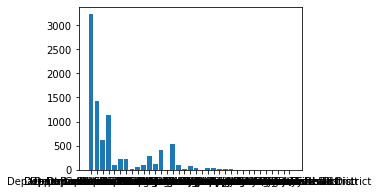

In [84]:
fig, ax = plt.subplots(figsize=(4,3))
ax.bar(agency_counter.keys(), agency_counter.values())
plt.show()

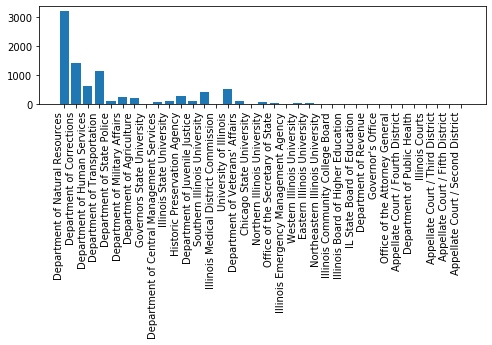

In [87]:
fig, ax = plt.subplots(figsize=(8,2))
ax.bar(agency_counter.keys(), agency_counter.values())
fig.autofmt_xdate(rotation=90)
plt.show()

In [88]:
agency_counter.most_common?

I'm going to grab the 10 most common Agency Names in this data set:

In [89]:
agency_counter_top_10 = agency_counter.most_common(n=10)
agency_counter_top_10

[('Department of Natural Resources', 3222),
 ('Department of Corrections', 1428),
 ('Department of Transportation', 1137),
 ('Department of Human Services', 617),
 ('University of Illinois', 525),
 ('Southern Illinois University', 420),
 ('Historic Preservation Agency', 284),
 ('Department of Military Affairs', 231),
 ('Department of Agriculture', 228),
 ('Department of Juvenile Justice', 120)]

In [90]:
type(agency_counter_top_10)

list

In [91]:
agency_counter_top_10[0]

('Department of Natural Resources', 3222)

In [93]:
agency_counter_top_10[0][0], agency_counter_top_10[0][1]

('Department of Natural Resources', 3222)

Loop through and seperate my list object into a 2 lists of (1) name of the agency in my top 10 list, (2) number of occurances in my dataset.

In [94]:
agency_name_top_10 = []; count = []
for ac in agency_counter_top_10:
    agency_name_top_10.append(ac[0])
    count.append(ac[1])

In [97]:
count

[3222, 1428, 1137, 617, 525, 420, 284, 231, 228, 120]

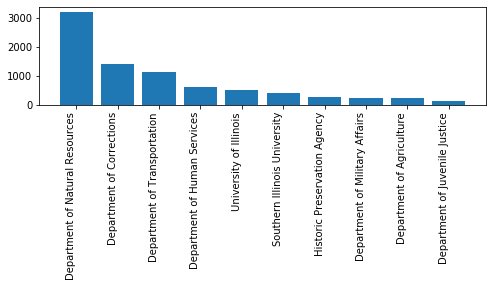

In [98]:
fig, ax = plt.subplots(figsize=(8,2))
ax.bar(agency_name_top_10, count)
fig.autofmt_xdate(rotation=90)
plt.show()

## Pandas - for the better or worst

In [99]:
import pandas as pd

In [100]:
buildings = pd.read_csv('/Users/jillnaiman/Downloads/building_inventory.csv')

In [101]:
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


In [102]:
buildings.index # this will show how many entries as an iterable

RangeIndex(start=0, stop=8862, step=1)

In [103]:
buildings.iloc[2000:2010]

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
2000,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1996,1996,140,1,1,0,Unusual,Unusual,Not provided
2001,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1963,1963,805,1,1,0,Storage,Storage,Not provided
2002,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1985,1985,1115,1,1,0,Storage,Storage,Not provided
2003,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1985,1985,128,1,1,0,Storage,Storage,Not provided
2004,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1979,1979,60,1,1,0,Storage,Storage,Not provided
2005,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1978,1978,288,1,1,0,Storage,Storage,Not provided
2006,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1979,1979,60,1,1,0,Unusual,Unusual,Not provided
2007,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1979,1979,20,1,1,0,Unusual,Unusual,Not provided
2008,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1982,1982,42,1,1,0,Unusual,Unusual,Not provided
2009,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1982,1982,42,1,1,0,Unusual,Unusual,Not provided


In [104]:
buildings.iloc[2000:2010]["Agency Name"] # pulling out entries by # & fields/columns

2000    Department of Natural Resources
2001    Department of Natural Resources
2002    Department of Natural Resources
2003    Department of Natural Resources
2004    Department of Natural Resources
2005    Department of Natural Resources
2006    Department of Natural Resources
2007    Department of Natural Resources
2008    Department of Natural Resources
2009    Department of Natural Resources
Name: Agency Name, dtype: object

In [105]:
buildings['Bldg Status'].unique()

array(['In Use', 'Abandon', 'In Progress'], dtype=object)

In [106]:
# summary info
buildings.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8.862000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1913.267660,1906.135184,1.147603e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,337.024796,351.180642,3.817263e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1957.000000,1953.000000,2.330000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1975.000000,1974.000000,1.600000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1992.000000,1991.000000,6.426500e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


Pandas can also do simple plots:

In [108]:
buildings["Square Footage"]

0         144
1         144
2         144
3         144
4         144
        ...  
8857      432
8858      330
8859      130
8860    49552
8861      288
Name: Square Footage, Length: 8862, dtype: int64

In [109]:
type(buildings["Square Footage"])

pandas.core.series.Series

In [110]:
type(buildings)

pandas.core.frame.DataFrame

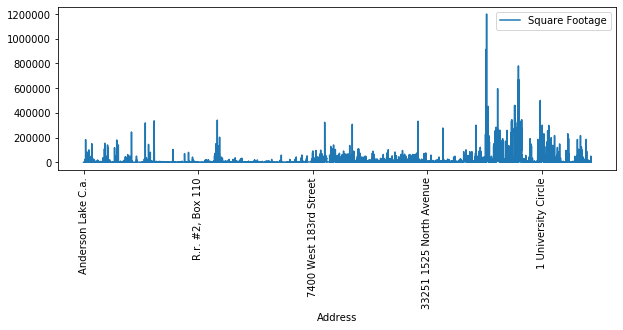

In [111]:
buildings.plot(x="Address", y="Square Footage", 
              figsize=(10,3), rot=90)

Pull out my axes objects and use them like matplotlib objects:

(1750, 2010)

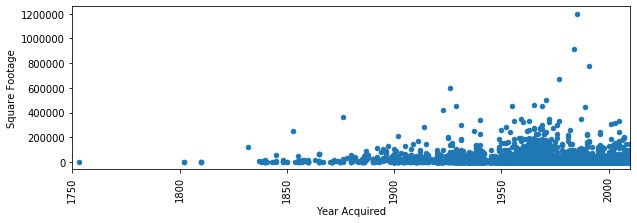

In [118]:
Z = buildings.plot(x="Year Acquired", y = "Square Footage", 
                  figsize=(10,3), rot=90, kind='scatter')
# can use axes object like any matplotlib one
Z.set_xlim(1750, 2010)

We'll use one of panda's neat tools: group by:

In [117]:
buildings.groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
0       1106855
1753       1200
1802       4440
1810       4033
1832     120000
         ...   
2015     305093
2016     304839
2017       6720
2018      17160
2019       1520
Name: Square Footage, Length: 172, dtype: int64